In [51]:
# Statical and Matematical libraries
import pandas as pd
import numpy as np

# Deep Neural Network libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Handling and Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Fuzzy function and Modules
import skfuzzy as fuzz

In [14]:
# Load ALS Dataset
df = pd.read_csv('Minsk2020_ALS_dataset.csv')

# Drop some unnecessery columns like ID,Sex 
features = df.drop(['ID', 'Sex', 'Diagnosis (ALS)'], axis=1)  # Remove non-numeric or non-relevant columns
target = df['Diagnosis (ALS)']

# Scale numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X = features.values
y = target.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
df.describe()

,ID,Age,J1_a,J3_a,J5_a,J55_a,S1_a,S3_a,S5_a,S11_a,...,dCCi(7),dCCi(8),dCCi(9),dCCi(10),dCCi(11),dCCi(12),d_1,F2_i,F2_{conv},Diagnosis (ALS)
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,67.875000,56.390625,0.658951,0.379242,0.395886,0.945496,5.072071,2.617924,3.078959,4.393513,...,0.003393,0.006224,-0.002889,-0.002152,-0.001969,0.001269,9.164473,2495.116475,1209.976405,0.484375
std,37.358198,10.203668,0.724002,0.435636,0.431926,0.791558,4.087221,2.289347,2.568471,3.327968,...,0.033268,0.024670,0.028315,0.019542,0.018012,0.020800,2.681449,617.755856,553.694046,0.503706
min,2.000000,34.000000,0.098881,0.065791,0.092655,0.285497,0.883453,0.449099,0.497111,0.804179,...,-0.052002,-0.069202,-0.120838,-0.065735,-0.042955,-0.083977,2.276702,444.730268,48.246203,0.000000
25%,31.750000,50.750000,0.325932,0.172422,0.198274,0.538387,2.641830,1.369446,1.508064,2.123761,...,-0.008234,-0.004222,-0.009654,-0.009853,-0.012674,-0.006534,7.604734,2051.627447,800.181156,0.000000
50%,66.500000,58.000000,0.458935,0.253976,0.293405,0.698183,4.198486,1.966045,2.653666,3.634994,...,0.000775,0.006272,-0.000937,-0.001614,-0.003921,0.000661,9.646564,2471.097222,1206.596083,0.000000
75%,98.250000,63.250000,0.772783,0.465699,0.476541,1.189025,6.259731,3.258184,3.801504,5.644808,...,0.011561,0.019092,0.006745,0.008349,0.005578,0.009515,10.757522,2938.236560,1551.677678,1.000000
max,131.000000,80.000000,5.391649,3.217293,3.321567,5.991336,29.441589,16.791944,18.368778,20.750202,...,0.220533,0.089766,0.080337,0.057303,0.061026,0.077897,15.420777,3599.554394,2441.219054,1.000000


In [43]:
# Fuzzify input data (trimf membership function)
# Note: Adjust fuzzification method and parameters

fuzzified_X_train = []
fuzzified_X_test = []

for col in range(X_train.shape[1]):
    membership = fuzz.trimf(X_train[:, col], [np.min(X_train[:, col]), np.mean(X_train[:, col]), np.max(X_train[:, col])])
    fuzzified_X_train.append(membership)

for col in range(X_test.shape[1]):
    membership = fuzz.trimf(X_test[:, col], [np.min(X_test[:, col]), np.mean(X_test[:, col]), np.max(X_test[:, col])])
    fuzzified_X_test.append(membership)

fuzzified_X_train = np.array(fuzzified_X_train).T 
fuzzified_X_test = np.array(fuzzified_X_test).T

In [44]:
# Define the DFNN architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=fuzzified_X_train.shape[1]),
    Dropout(0.2), 
    Dense(32, activation='relu'),
    # Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 64)             │         8,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:

# Train the model
model.fit(fuzzified_X_train, y_train, epochs=60, batch_size=32, validation_data=(fuzzified_X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(fuzzified_X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4726 - loss: 0.7453 - val_accuracy: 0.4615 - val_loss: 0.6920
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4961 - loss: 0.7165 - val_accuracy: 0.6154 - val_loss: 0.6779
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6344 - loss: 0.6547 - val_accuracy: 0.6154 - val_loss: 0.6688
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6189 - loss: 0.6297 - val_accuracy: 0.5385 - val_loss: 0.6660
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7102 - loss: 0.5833 - val_accuracy: 0.5385 - val_loss: 0.6620
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6605 - loss: 0.6492 - val_accuracy: 0.5385 - val_loss: 0.6541
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7259 - loss: 0.5895 - val_accuracy: 0.6154 - val_loss: 0.6514
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7337 - loss: 0.5287 - val_accuracy: 0.6923 - val_loss: 0.6491

In [46]:
y_pred_prob =model.predict(fuzzified_X_test)
y_pred_prob =(y_pred_prob > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [47]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test,y_pred_prob)
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.80      0.67      0.73         6

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76        13
weighted avg       0.77      0.77      0.77        13



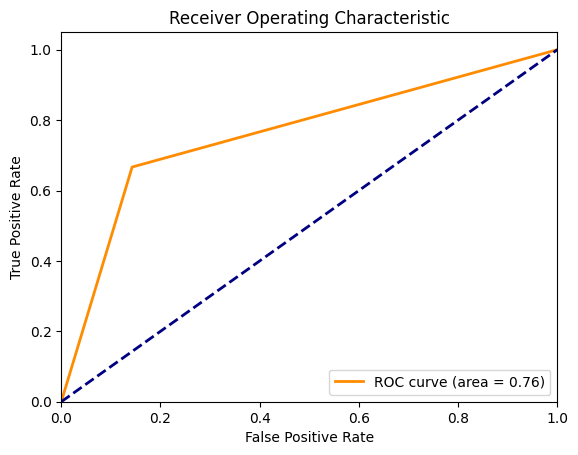

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
